Mean squared error: 0.25


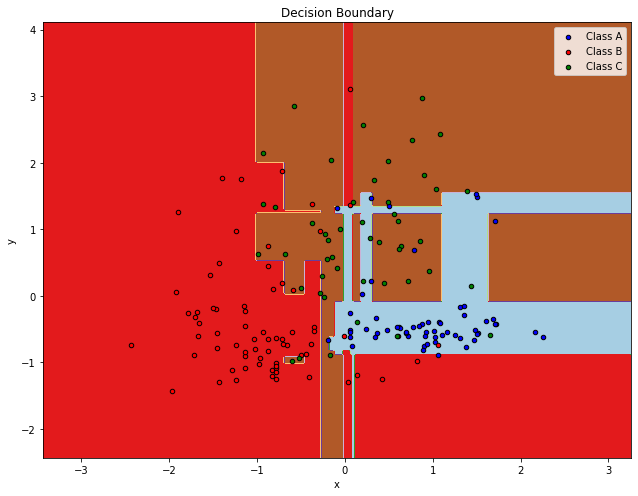

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

wine = datasets.load_wine()
# we create 50 separable points
X = wine.data[:, :2]
y = wine.target
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)
y_pred = bdt.predict(X)
print("Mean squared error: %.2f"
          % mean_squared_error(y, y_pred))
  

plot_colors = "brg"
plot_step = 0.02
class_names = "ABC"

plt.figure(figsize=(20, 7))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


# Plot the training points
for i, n, c in zip(range(3), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')



plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()